In [63]:
import json
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from glob import glob

sns.set_style("darkgrid")

In [64]:
datas = []
for file_name in glob("logs/*.txt"):
    print(file_name)
    file = open(file_name, "rb")
    for data in file.readlines():
        if len(data) < 10: # Ignoring blank space/not useful information
            continue
        datas.append(eval(data))
        
datas = pd.DataFrame(datas)

logs/IID-B10-C1.0-MNIST.txt
logs/IID-B600-C0.1-MNIST.txt
logs/IID-B10-C0.1-MNIST.txt
logs/IID-B10-C0.0-MNIST.txt
logs/IID-B600-C0.0-MNIST.txt


In [65]:
# Sort the data
df_metrics = datas.sort_values(by=['B', 'C', 'comm_round']).reset_index(drop=True)
df_metrics.head()

,C,B,comm_round,train_acc,test_acc,train_loss,test_loss
0,0.0,10,1,0.7448,0.7448,4.0410,4.0120
1,0.0,10,2,0.8134,0.8164,2.9616,2.9090
2,0.0,10,3,0.8047,0.8138,3.0942,2.9425
3,0.0,10,4,0.8851,0.8931,1.8170,1.6892
4,0.0,10,5,0.8728,0.8793,2.0206,1.9154


In [66]:
df_metrics.groupby(["B","C"]).size()

B    C  
10   0.0     127
     0.1      53
     1.0      45
600  0.0    2449
     0.1    2526
dtype: int64

In [76]:
# Plot function for accuracy
def plot_accuracy(B, C):
    current_case = df_metrics[(df_metrics['C'] == C) & (df_metrics['B'] == B)]
    if len(current_case) == 0:
        return "B=%s, C=%s combination does not exists" % (B,C)

    plt.figure(figsize=(8,5))

    sns.lineplot(data=current_case, x='comm_round', y='train_acc', label='train_accuracy', linestyle="--")
    sns.lineplot(data=current_case, x='comm_round', y='test_acc', label='test_accuracy')
    plt.axhline(y=0.97, color='grey', linestyle='--', label = "97% Accuracy")

    plt.ylim(max(current_case['train_acc'].min(), current_case['test_acc'].min()), None)
    plt.ylabel("Accuracy")
    plt.xlabel("Communication Rounds")
    plt.title("MNIST 2NN IID\nB=%s, C=%s" % (B, C))
    plt.legend(loc='lower right')
    plt.show()

In [77]:
# Plot function for loss
def plot_loss(B, C):
    current_case = df_metrics[(df_metrics['C'] == C) & (df_metrics['B'] == B)]
    if len(current_case) == 0:
        return "B=%s, C=%s combination does not exists" % (B,C)
    
    plt.figure(figsize=(8,5))

    sns.lineplot(data=current_case, x='comm_round', y='train_loss', label='train_loss', linestyle="--")
    sns.lineplot(data=current_case, x='comm_round', y='test_loss', label='test_loss')
    
    plt.ylim(None, min(current_case['train_loss'].max(), current_case['test_loss'].max()))
    plt.ylabel("Loss")
    plt.xlabel("Communication Rounds")
    plt.title("MNIST 2NN IID\nB=%s, C=%s" % (B, C))
    plt.legend(loc='upper right')
    plt.show()

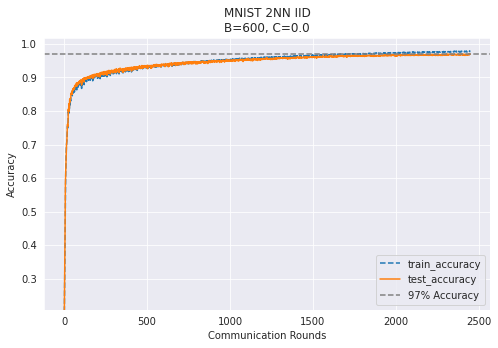

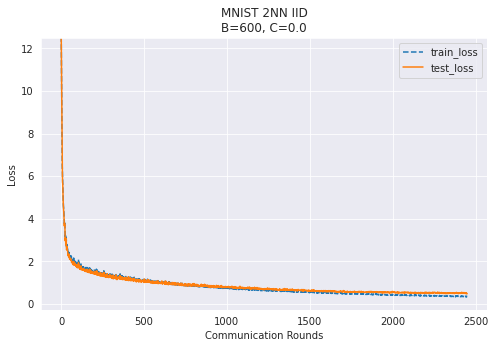

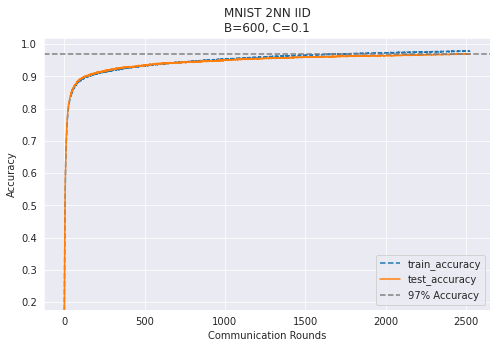

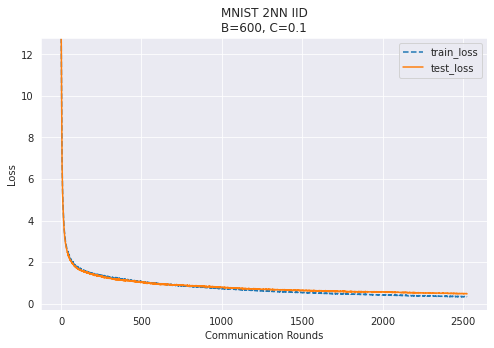

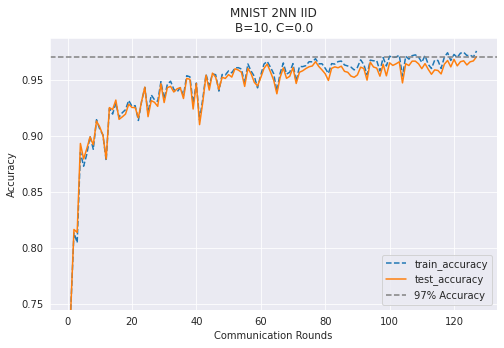

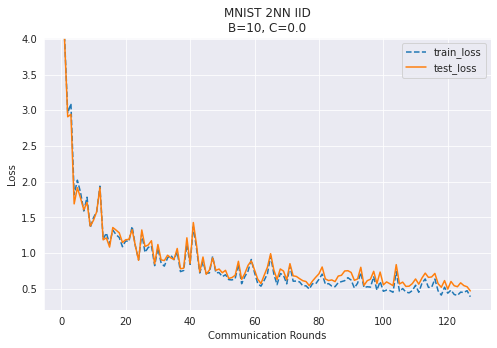

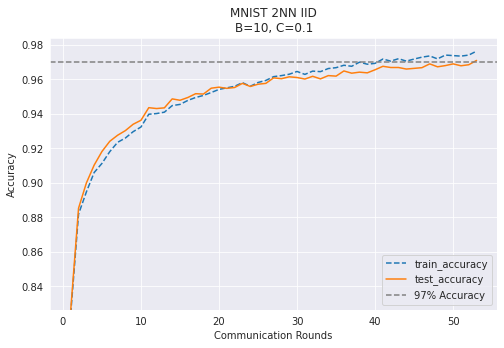

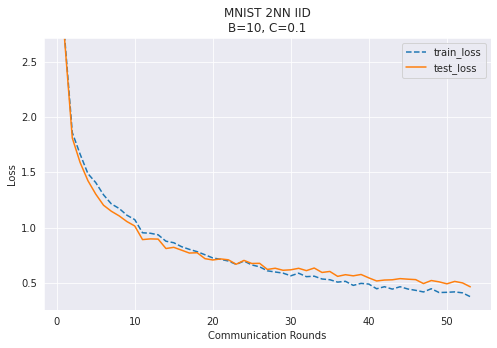

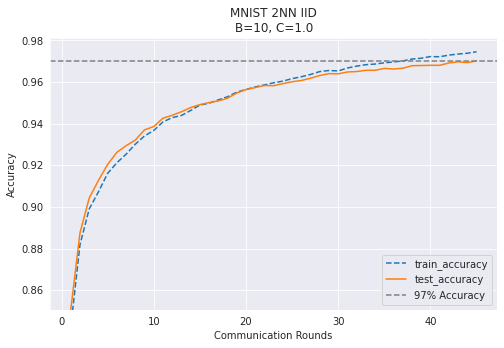

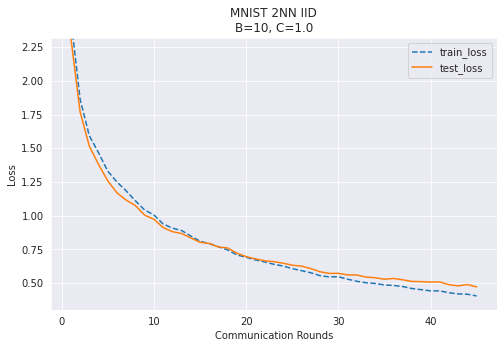

In [78]:
# Plot all accuracy and losses
BATCHES = [600, 10]
C_FRACTIONS = [0.0, 0.1, 1.0]

for b in BATCHES:
    for c in C_FRACTIONS:
        plot_accuracy(b, c)
        plot_loss(b, c)